[Reference](https://medium.com/@deepml1818/predicting-stock-prices-with-machine-learning-in-python-a-step-by-step-guide-c53f36ab1ccd)

# Step 1: Install Required Libraries

In [1]:
!pip install yfinance pandas scikit-learn matplotlib

# Step 2: Fetch Historical Data

In [2]:
import yfinance as yf
import pandas as pd
# Fetch historical data for Apple Inc.
ticker = 'AAPL'
data = yf.download(ticker)
# Display the first few rows of the dataset
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091631   73449600


# Step 3: Preprocess Data

In [3]:
# Calculate moving averages
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
# Drop NaN values
data = data.dropna()
# Define features and target
X = data[['Close', 'MA_10', 'MA_50']]
y = data['Close'].shift(-1).dropna()
X = X[:-1]
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Predictive Model

In [4]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.7149552425945213
R² Score: 0.9996664549315815


# Step 5: Visualize the Results

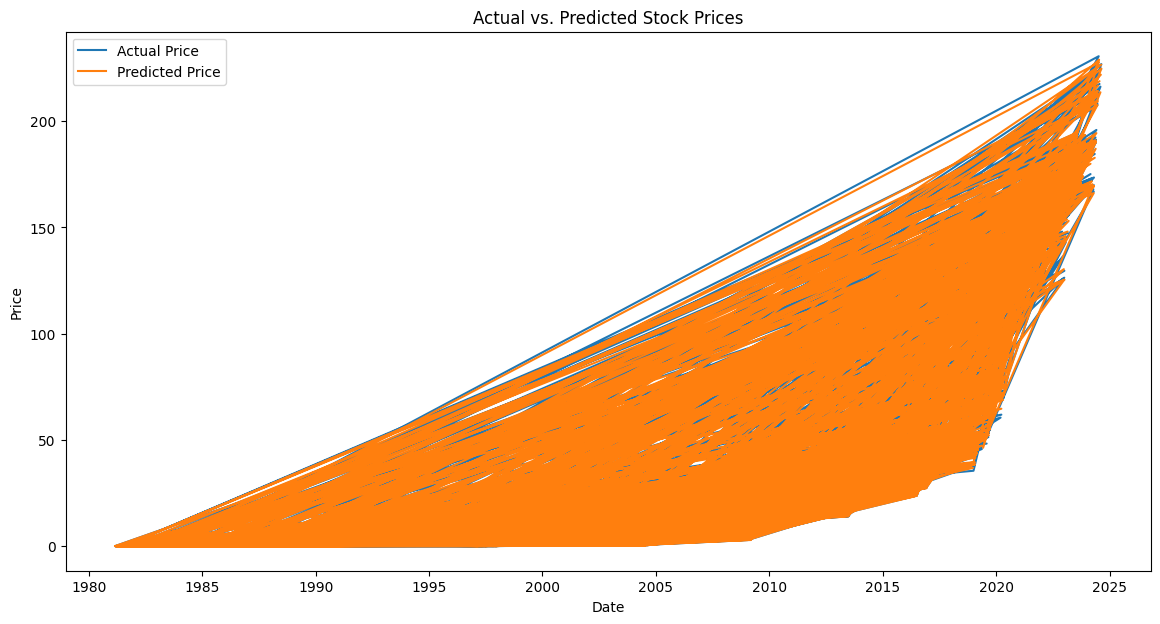

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

# Step 6: Implement Trading Strategy

In [6]:
initial_balance = 10000  # Starting balance in USD
balance = initial_balance
position = 0  # Number of shares

for i in range(len(X_test)):
    current_price = X_test.iloc[i]['Close']
    predicted_price = predictions[i]

    if predicted_price > current_price and balance >= current_price:
        # Buy stock
        shares_to_buy = int(balance // current_price)  # Buy whole shares only
        if shares_to_buy > 0:  # Ensure we are buying at least one share
            position += shares_to_buy
            balance -= shares_to_buy * current_price
            print(f"Buying {shares_to_buy} shares at {current_price:.2f}")

    elif predicted_price < current_price and position > 0:
        # Sell stock
        balance += position * current_price
        print(f"Selling {position} shares at {current_price:.2f}")
        position = 0

# Calculate final balance including the value of the remaining shares
final_balance = balance + (position * X_test.iloc[-1]['Close'])
profit = final_balance - initial_balance
print(f"Final balance: ${final_balance:.2f}")
print(f"Profit: ${profit:.2f}")

Buying 81826 shares at 0.12
Selling 81826 shares at 21.47
Buying 5335389 shares at 0.33
Buying 1 shares at 0.07
Selling 5335390 shares at 70.10
Buying 4062124418 shares at 0.09
Selling 4062124418 shares at 21.15
Buying 239117323823 shares at 0.36
Buying 1 shares at 0.22
Buying 1 shares at 0.07
Selling 239117323825 shares at 226.34
Buying 20005423573938 shares at 2.71
Buying 1 shares at 1.42
Buying 2 shares at 0.39
Selling 20005423573941 shares at 227.57
Buying 45324197655806848 shares at 0.10
Selling 45324197655806848 shares at 214.29
Buying 101191077367755374592 shares at 0.10
Selling 101191077367755374592 shares at 148.48
Buying 2646717857329326850048 shares at 5.68
Selling 2646717857329326850048 shares at 88.02
Buying 73234484161819908767744 shares at 3.18
Selling 73234484161819908767744 shares at 95.92
Buying 14201457511119866843627520 shares at 0.49
Selling 14201457511119866843627520 shares at 6.43
Buying 7373975202607398291243008 shares at 12.38
Selling 7373975202607398291243008 